# Data Science Project:
## Predicting Employee Turnover

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression

import pickle



In [2]:
# Load dataset
df0 = pd.read_csv("EmployeeTurnoverDataset.csv")

# Display first few rows of the dataset
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###  Now do some basic data exploration, gather basic information about the dataset and data cleaning

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# get descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename the columns so they're all in lower case and in the same format
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'time_at_company',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Let's see if there're any NaN values in there
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_at_company          0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# No nan values which is good. Now check if there're duplicated values in the dataset
df0.duplicated().sum()

3008

In [9]:
# Looks like there are over 3k duplicated values, let's have a look at them
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Now we remove all those duplicated values and only saving the first occurence of them
df_new = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


D:\Applications\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_at_company'>

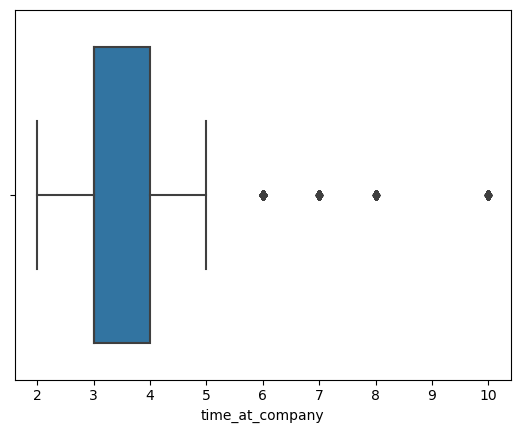

In [11]:
# We now check if there're any outliers to the dataset. We check the employees time at the company, since staying at the company
# for too long or too brief may affect the final result. We do so by creating a box plot.

sns.boxplot(df_new['time_at_company'])


In [12]:
# There're definitely some outliers there indicated by the dots to the right hand side.
# Now we need to identify those outliers.

# Get the 25% and 75% percentiles
perc25 = df_new['time_at_company'].quantile(0.25)
perc75 = df_new['time_at_company'].quantile(0.75)

# Get interquartiles range and define upper and lower limit
iqr = perc75 - perc25
upper = perc75 + 1.5*iqr
lower = perc25 - 1.5*iqr
print(f'Upper limit: {upper}.')
print(f'Lower limit: {lower}.')

# Single out those outliers
outliers = df_new[(df_new['time_at_company'] > upper) | (df_new['time_at_company'] < lower)]
print(f'Number of outliers is: {len(outliers)}')

Upper limit: 5.5.
Lower limit: 1.5.
Number of outliers is: 824


In [13]:
# Check how many left and how many stayed
print(df_new['left'].value_counts())

# Do the same thing in percentage
print(df_new['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


Looks like the data is not well balanced, but not too much so

### Now we make some plots to visualize the relationships between some of the variables

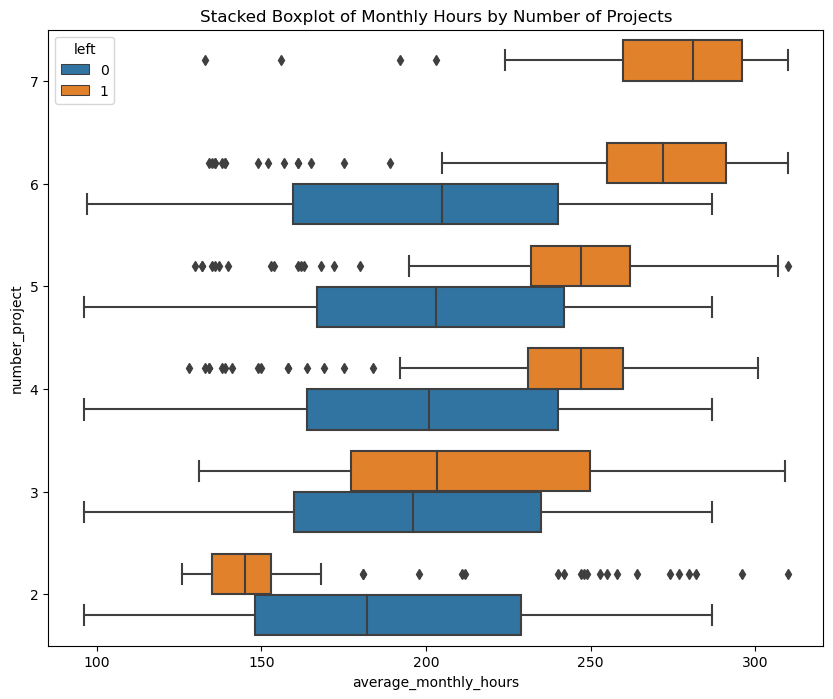

In [14]:
# Average monthly hours vs Number of projects box plot
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_new,x='average_monthly_hours',y='number_project',hue='left',orient='h')
ax.set_title('Stacked Boxplot of Monthly Hours by Number of Projects')
ax.invert_yaxis()

Text(0.5, 1.0, 'Histogram of Number of Projects For the Two Groups')

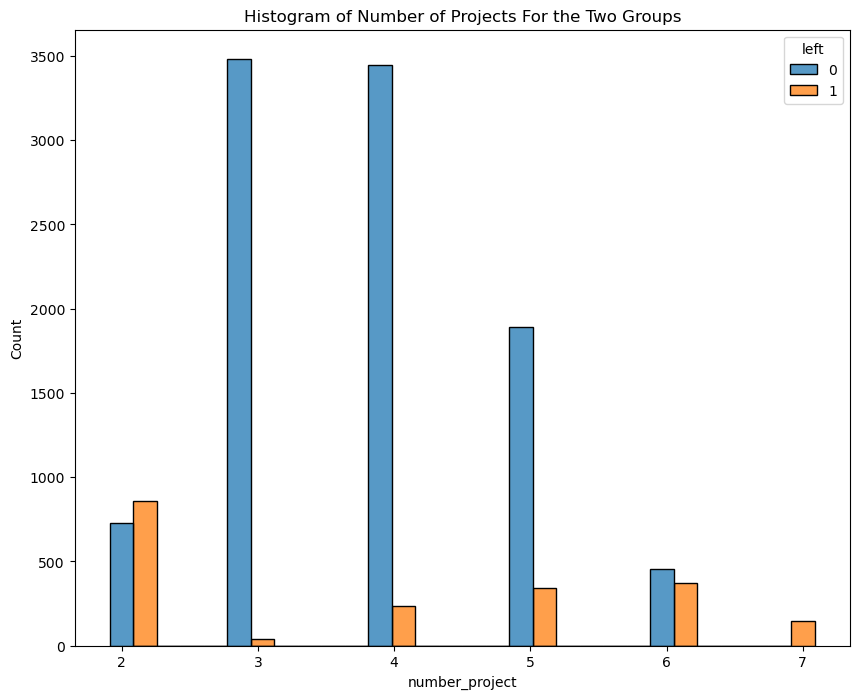

In [15]:
# Side by side comparison of two groups of employee (left or stayed) through a bar plot of number of projects
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df_new,x='number_project',hue='left',multiple='dodge',shrink=2)
ax.set_title('Histogram of Number of Projects For the Two Groups')

Text(0.5, 1.0, 'Scatter Plot of Satisfaction Level vs Monthly Hours of Employees')

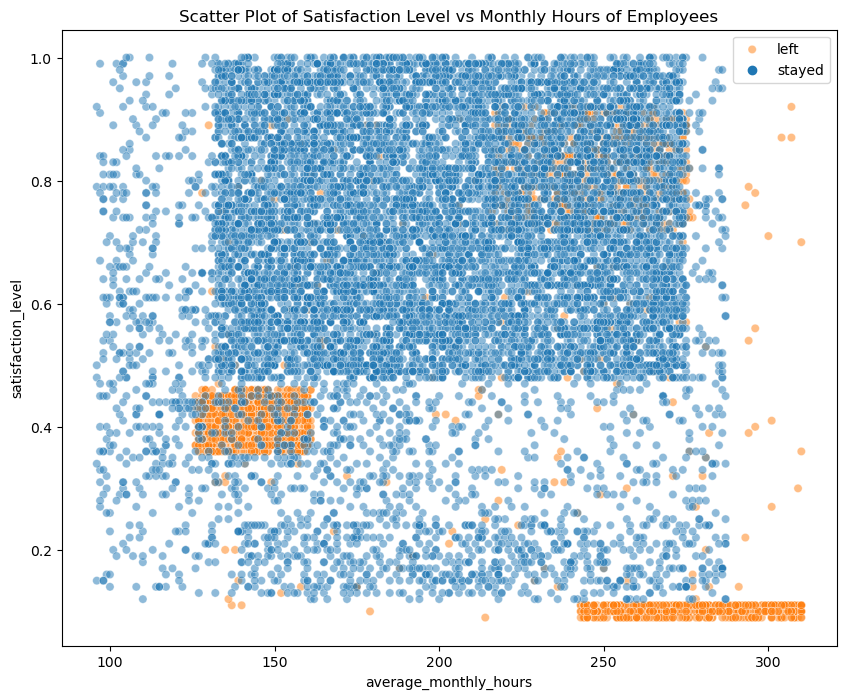

In [17]:
# Scatter plot of employee satisfaction level vs average monthly hours
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_new, x='average_monthly_hours', y='satisfaction_level',hue='left',alpha=0.5)
plt.legend(labels=['left','stayed'])
plt.title('Scatter Plot of Satisfaction Level vs Monthly Hours of Employees')

There appears to be chunks of data clustered together, which is a sign of the data being synthetic, not real.

Text(0.5, 1.0, 'Histogram of Time at Company for Two Groups of Employee')

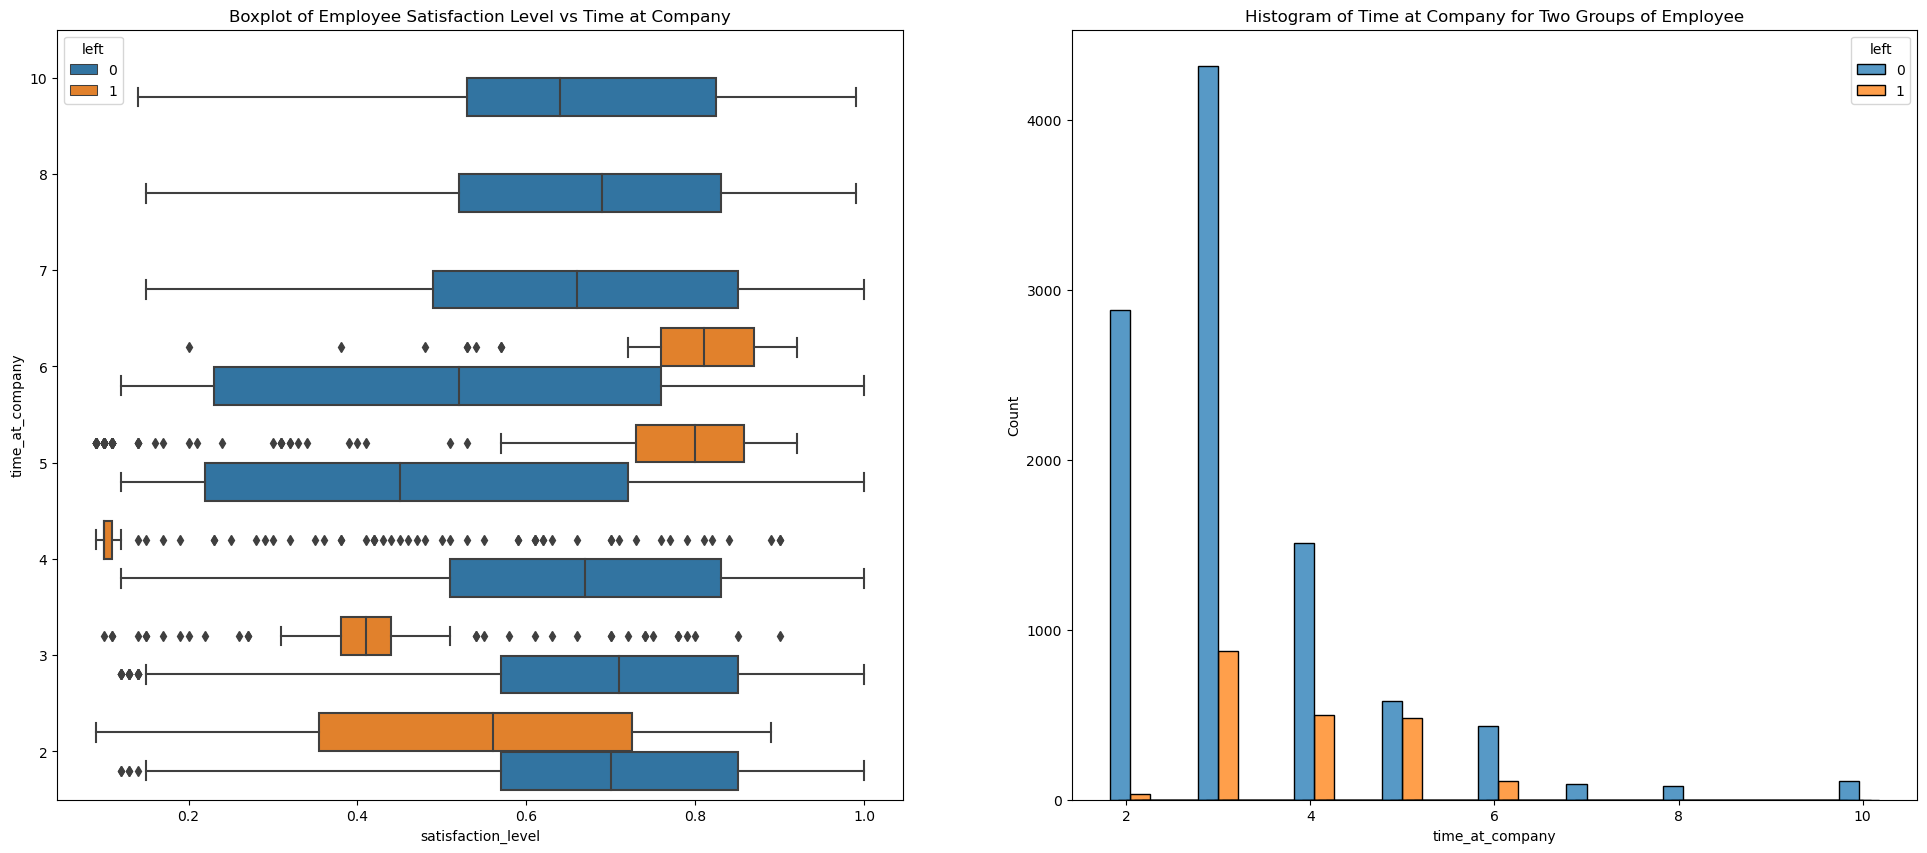

In [18]:
# Boxplot of employee employed time at the company vs satisfaction level
fig,ax = plt.subplots(1,2,figsize=(24,10))
sns.boxplot(data=df_new,x='satisfaction_level',y='time_at_company',hue='left',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Boxplot of Employee Satisfaction Level vs Time at Company')

# Side by side comparison of employee employed time at the company through a bar plot
sns.histplot(data=df_new,x='time_at_company',hue='left',multiple='dodge',shrink=5,ax=ax[1])
ax[1].set_title('Histogram of Time at Company for Two Groups of Employee')

In [19]:
# Check the employee satisfaction level wrt the two different groups of employee
df_new.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employee who have left clearly have lower level of satisfaction

Text(0.5, 1.0, 'Historgram of Employee Salary vs Time at Company')

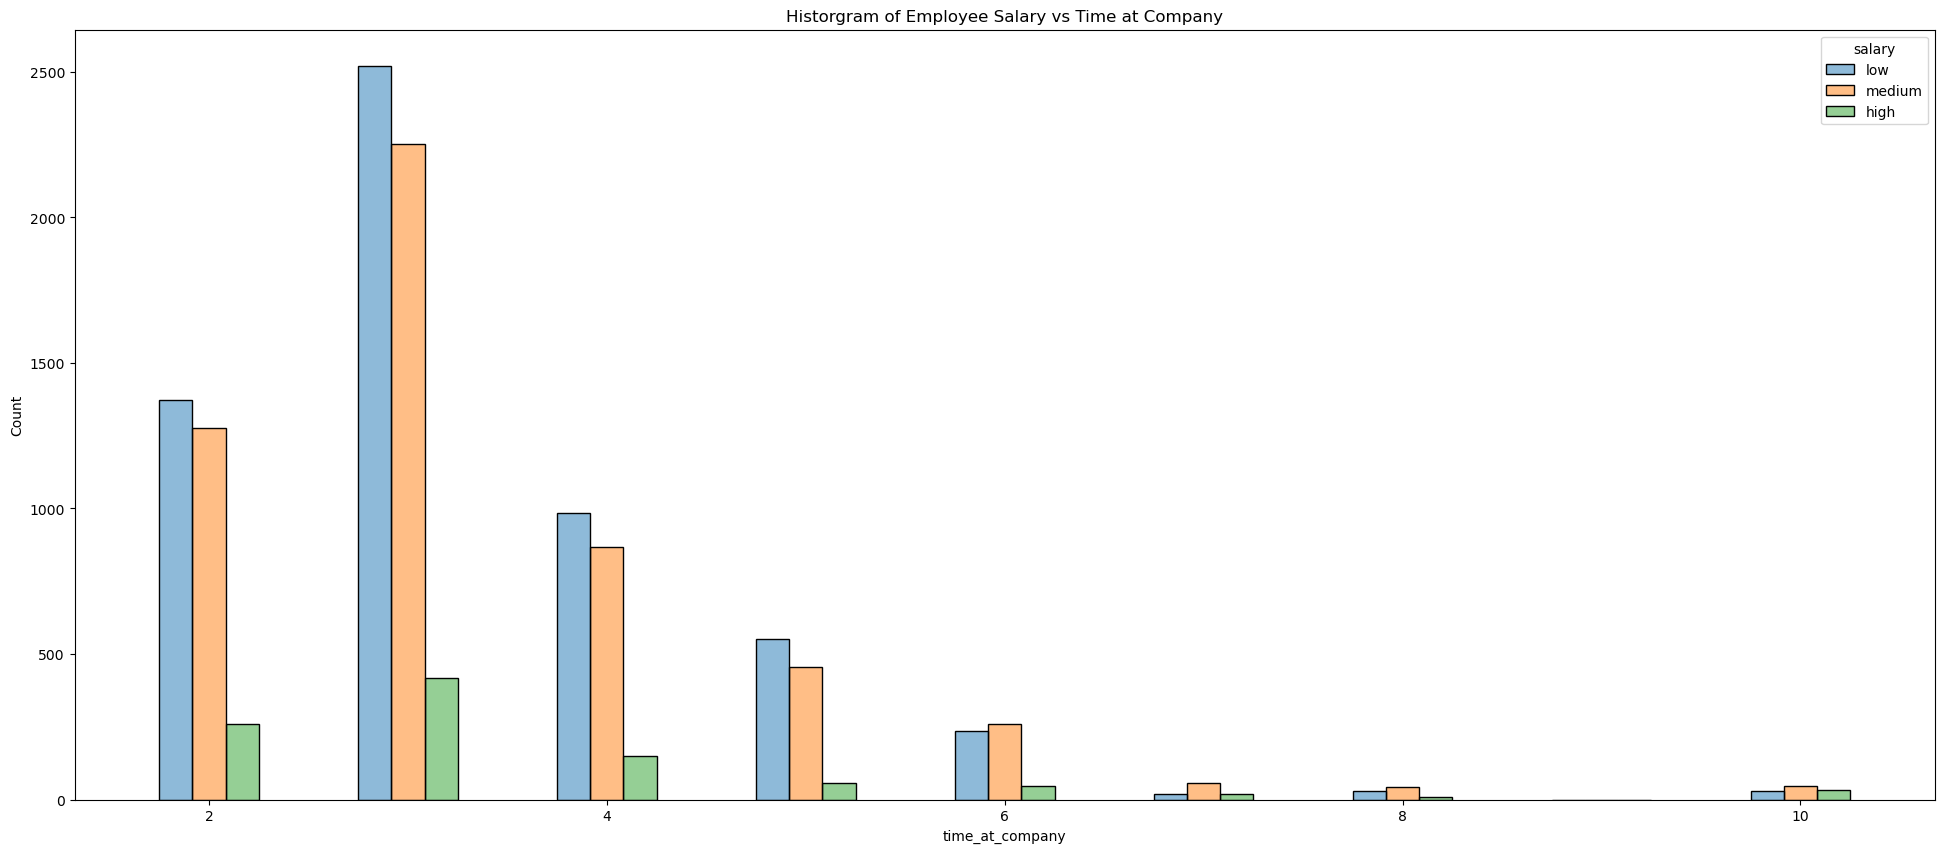

In [20]:
# Bar plot for employed time at the company wrt 3 different salary subgroups
fig,ax = plt.subplots(figsize=(24,10))
sns.histplot(data=df_new,x='time_at_company',hue='salary',discrete=1,hue_order=['low','medium','high'],multiple='dodge',\
            shrink=0.5,alpha=0.5)
ax.set_title('Historgram of Employee Salary vs Time at Company')

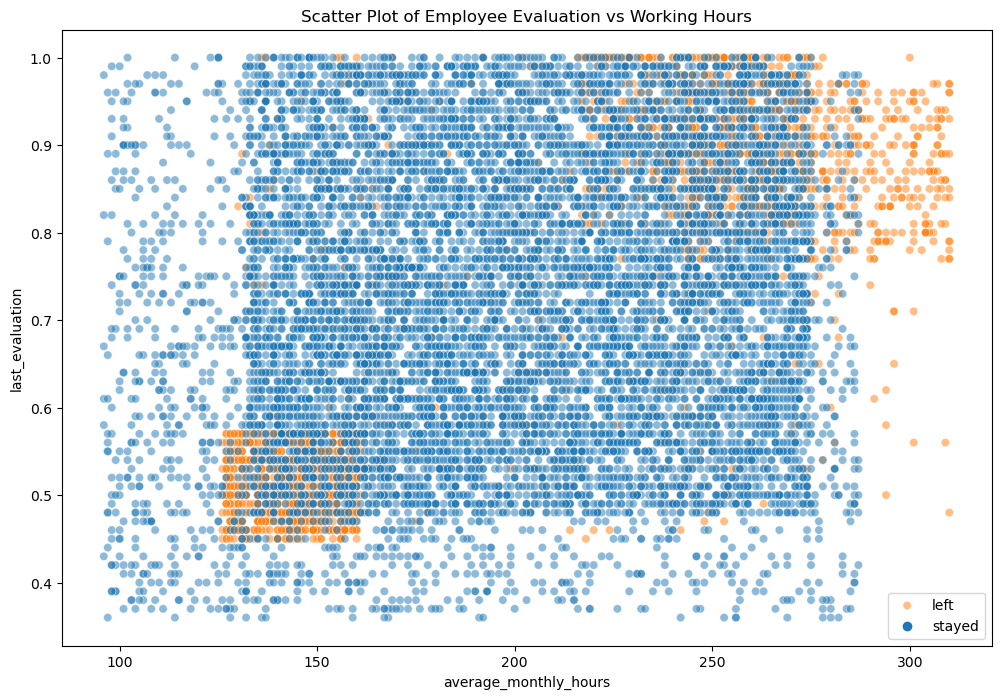

In [21]:
# Let's see if there's a correlation between employees' average monthly hours and their performance in their last evaluation
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df_new,x='average_monthly_hours',y='last_evaluation',hue='left',alpha=0.5)
ax.set_title('Scatter Plot of Employee Evaluation vs Working Hours')
plt.legend(labels=['left','stayed'])

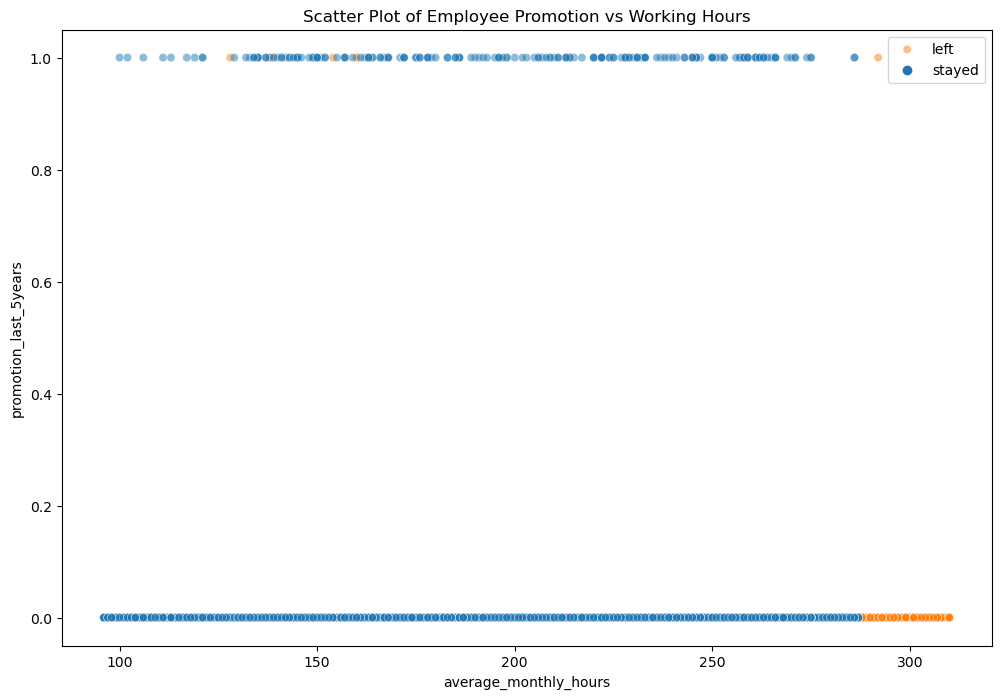

In [22]:
# How about working hours vs promotions in the last five years?
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_new,x='average_monthly_hours',y='promotion_last_5years',hue='left',alpha=0.5)
plt.title('Scatter Plot of Employee Promotion vs Working Hours')
plt.legend(labels=['left','stayed'])

In [23]:
# Check if the number of people left in each department
df_new[df_new['left'] == 1]['department'].value_counts()

sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: department, dtype: int64

Text(0.5, 1.0, 'Histogram of Two Types of Employees Across Departments')

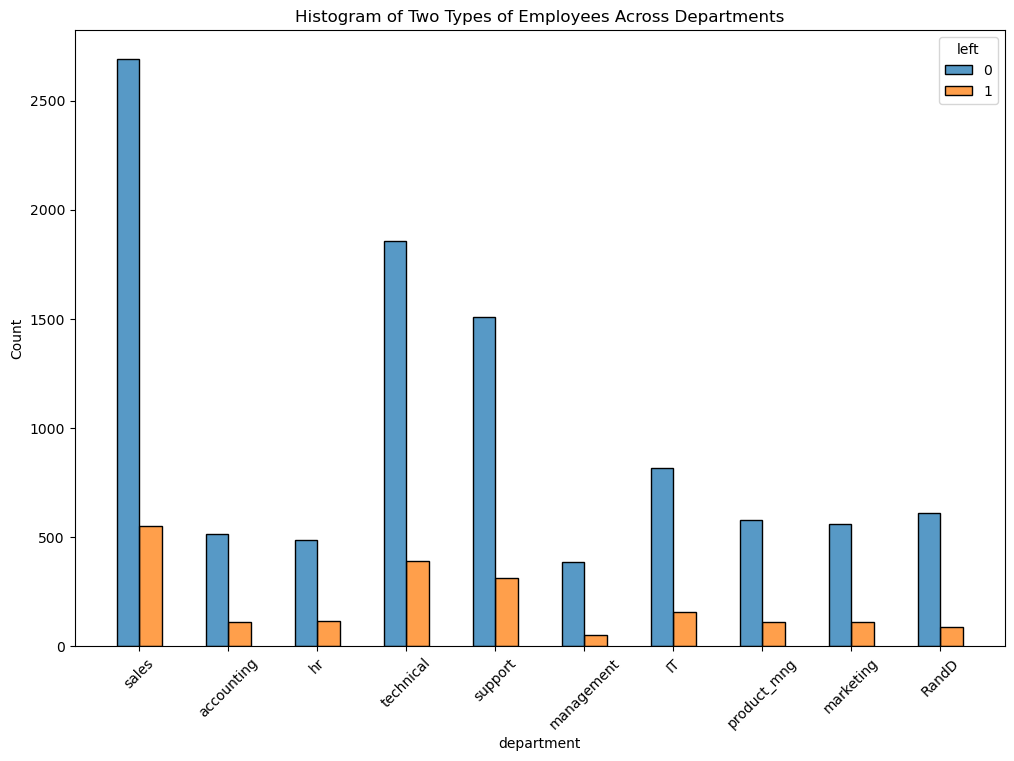

In [24]:
# Now take a look and see if the distribution of those who left is evenly distributed or biased towards a certain department(s)
plt.figure(figsize=(12,8))
sns.histplot(data=df_new,x='department',hue='left',multiple='dodge',hue_order=[0,1],discrete=1,shrink=0.5)
plt.xticks(rotation=45)
plt.title('Histogram of Two Types of Employees Across Departments')

Looks like employee who left have a consistent proportion across all departments. So employee turnover not really a department issue here.

Text(0.5, 1.0, 'Heatmap of Variable Correlations')

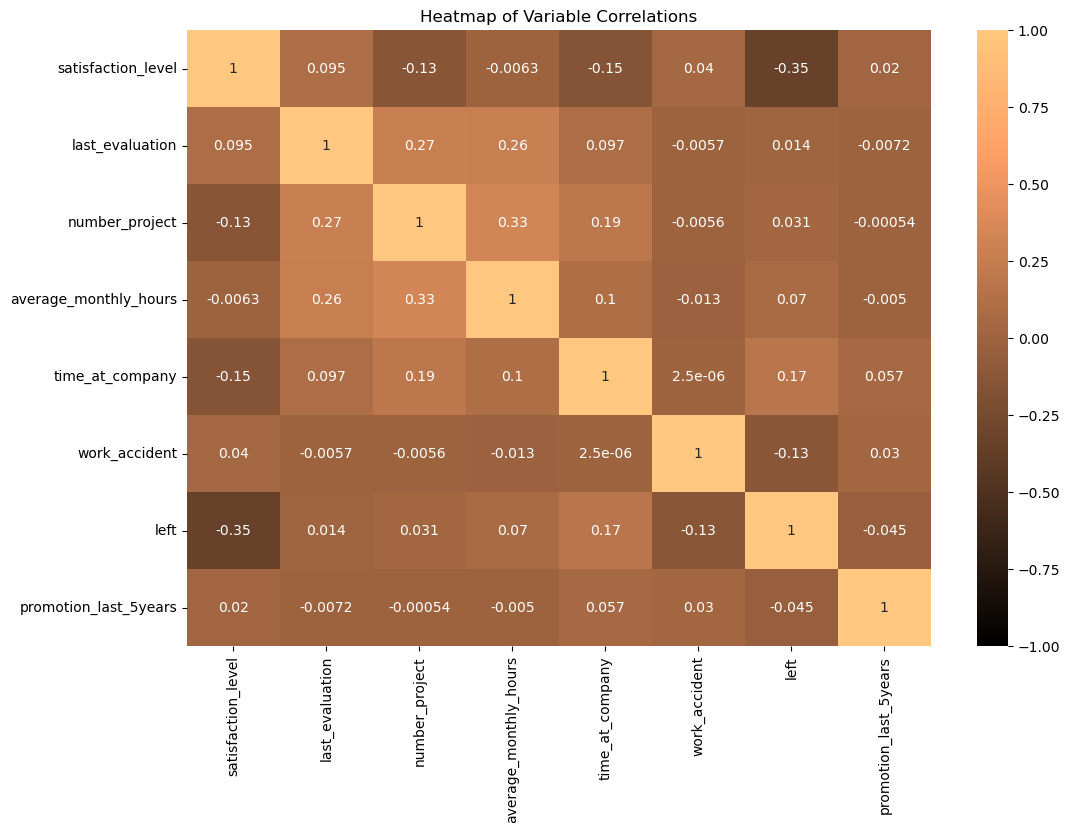

In [25]:
# Check variable correlations with each other through a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),vmin=-1,vmax=1,annot=True,cmap='copper')
plt.title('Heatmap of Variable Correlations')

### Before building models, we need to turn all categorical variables into numerical values

In [26]:
df_enc = df_new.copy()

# Since the salary column is ordinal, we manually encode them to 0, 1, and 2
df_enc['salary'].replace(['low','medium','high'],[0,1,2],inplace=True)

# We encode other categorical variables using dummies variables
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_at_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Now let's build some models to predict whether a employee stays or quits
First for any classification tasks, we start with a simple logistic regression to see how it performs

In [27]:
# Logistic regression is sensitive to outliers so we need to remove them for modeling here
df_log = df_enc[(df_enc['time_at_company'] >= lower) & (df_enc['time_at_company'] <= upper)]
df_log.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_at_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Get the target variable and feature variables for modeling
y = df_log['left']
X = df_log.copy()
X = X.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_at_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [30]:
# Instantiate the logistic regression object and fit it
model_log = LogisticRegression(random_state=42, max_iter=500)
model_log = model_log.fit(X_train, y_train)

In [31]:
# Use the model to predict the target variable
log_pred = model_log.predict(X_test)

In [32]:
# Calculate the various metrics
print(f'Precision score is: {precision_score(y_test, log_pred)}.')
print(f'Recall score is: {recall_score(y_test, log_pred)}.')
print(f'Accuracy score is: {accuracy_score(y_test, log_pred)}.')
print(f'F1 score is: {f1_score(y_test, log_pred)}.')

Precision score is: 0.4392857142857143.
Recall score is: 0.2611464968152866.
Accuracy score is: 0.8191260744985673.
F1 score is: 0.32756324900133155.


In [33]:
# Not a great result, let's take a look at what's going on
print(classification_report(y_test, log_pred, target_names=['Would Not Leave','Would Leave']))

                 precision    recall  f1-score   support

Would Not Leave       0.86      0.93      0.90      2321
    Would Leave       0.44      0.26      0.33       471

       accuracy                           0.82      2792
      macro avg       0.65      0.60      0.61      2792
   weighted avg       0.79      0.82      0.80      2792



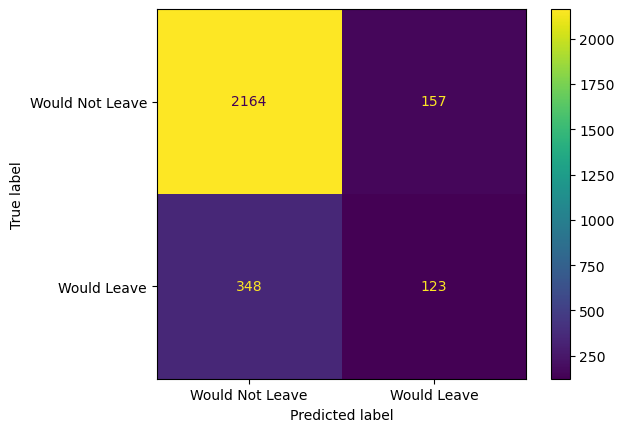

In [34]:
# Considering the data for the employees who left is only a small proportion, it's understandable logistic regression didn't
# perform well on this category. But on average, the result is okay.

# Now plot the confusion matrix
cm_log = confusion_matrix(y_test, log_pred, labels=model_log.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Would Not Leave','Would Leave'])
disp_log.plot()

Now let's see what trees can do

In [35]:
# Redefine X and y variables. Since outliers are okay with trees, there's no need to remove them, so we use the original
# encoded data
y = df_enc['left']
X = df_enc.copy()
X = X.drop('left',axis=1)

In [36]:
# Split data, make sure we stratify it to ensure proper splitting according to the original proportions of the two groups in the
# data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [37]:
# Instantiate the model and define hyperparameters to try using GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[2,4,6,8,10,None],
             'min_samples_leaf':[2,5,10,20],
             'min_samples_split':[2,4,6,8]}
scoring = {'accuracy','precision','recall','f1','roc_auc'}

model_dt = GridSearchCV(dt,cv_params,scoring=scoring,cv=10,refit='roc_auc',n_jobs=-1)

In [38]:
# Fit the decision tree model
model_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 4, 6, 8]},
             refit='roc_auc',
             scoring={'precision', 'roc_auc', 'f1', 'recall', 'accuracy'})

In [39]:
# get the best parameters and scores of this cross validated model
print(model_dt.best_params_)
print(model_dt.best_score_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.975007621178225


In [40]:
# write a function to record all the scores from the gridsearch
def get_scores(name, model, metric):
    '''
    name: string of the name of the model
    model: model results from the gridsearchcv
    metric: metric to use to determine the best model
    '''
    all_metrics = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'accuracy': 'mean_test_accuracy',
                   'f1': 'mean_test_f1',
                   'roc_auc': 'mean_test_roc_auc'}
    results = pd.DataFrame(model.cv_results_)
    
    # get the model with the best result
    best_result = results.iloc[results[all_metrics[metric]].idxmax(), :]
    
    # get all the scores from the best model
    precision = best_result.mean_test_precision
    recall = best_result.mean_test_recall
    accuracy = best_result.mean_test_accuracy
    f1 = best_result.mean_test_f1
    roc_auc = best_result.mean_test_roc_auc
    
    final = pd.DataFrame({'model':[name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'roc_auc': [roc_auc]})
    return final

In [41]:
model_dt_results = get_scores('Decision Tree', model_dt, 'roc_auc')
model_dt_results

,model,precision,recall,f1,accuracy,roc_auc
0,Decision Tree,0.970397,0.918944,0.943801,0.981875,0.975008


It performs much better than logistic regression!

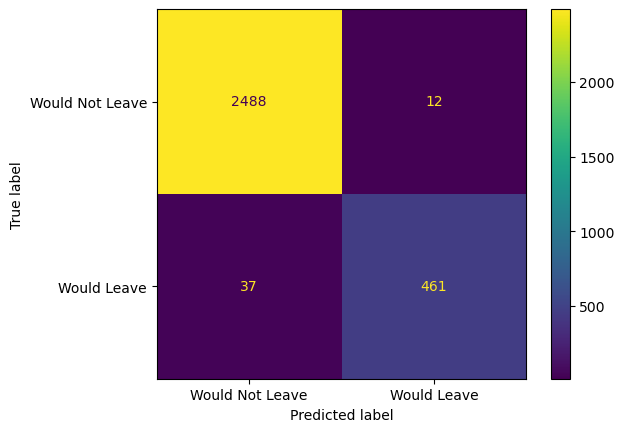

In [42]:
# plot a confusion matrix using the best estimator
model_dt_pred = model_dt.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, model_dt_pred, labels=model_dt.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Would Not Leave','Would Leave'])
disp_dt.plot()

In [43]:
# get feature importance from the decision tree model
model_dt_importance = pd.DataFrame(model_dt.best_estimator_.feature_importances_, columns=['gini_importance'],index=X.columns)

In [44]:
model_dt_importance = model_dt_importance.sort_values(by='gini_importance',ascending=False)
model_dt_importance

,gini_importance
satisfaction_level,0.499251
last_evaluation,0.170288
number_project,0.131639
time_at_company,0.120583
average_monthly_hours,0.076951
department_technical,0.001004
salary,0.000150
department_support,0.000134
promotion_last_5years,0.000000
department_IT,0.000000


<AxesSubplot:xlabel='gini_importance'>

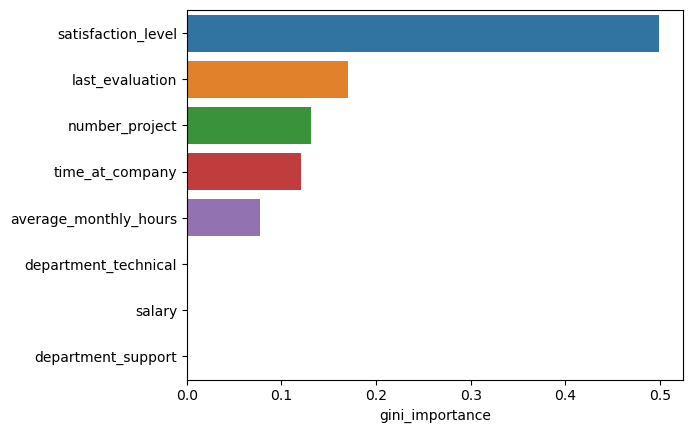

In [45]:
# create a visualization of feature importance, include only non zero components
model_dt_importance_nonzero = model_dt_importance[model_dt_importance['gini_importance'] > 0]
sns.barplot(data=model_dt_importance_nonzero, x='gini_importance', y=model_dt_importance_nonzero.index,orient='h')

We have completed the tree model and the result looks pretty good. Five top contributors to employee turnover have also been
identified.

Now let's check if an ensemble method can do even better

In [46]:
# Now try an ensemble method, random forest
# We can use the same data split since tree models don't care about outliers and distributions
rf = RandomForestClassifier(random_state=42)

cv_params_rf = {'max_depth':[2,4,6,8,10,None],
                'min_samples_leaf':[2,5,10,20],
                'min_samples_split':[2,4,6],
                'max_features':[0.8,1.0],
                'n_estimators':[100,300,500],
                'max_samples':[0.7, 1.0]}

scoring_rf = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

model_rf = GridSearchCV(rf, cv_params_rf, scoring = scoring_rf, cv=10, refit='roc_auc', n_jobs=-1)

In [47]:
model_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [0.8, 1.0], 'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 300, 500]},
             refit='roc_auc',
             scoring={'precision', 'roc_auc', 'f1', 'recall', 'accuracy'})

In [53]:
# check the best parameters and best scores
print(model_rf.best_params_)
print(model_rf.best_score_)

{'max_depth': 8, 'max_features': 0.8, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.9827793736017896


In [54]:
# get all the scores from the gridsearch
model_rf_scores = get_scores('Random Forest', model_rf, 'roc_auc')

In [58]:
model_rf_scores

,model,precision,recall,f1,accuracy,roc_auc
0,Random Forest,0.98501,0.91626,0.949193,0.983765,0.982779


Random forest provides a slightly better performance than decision tree!

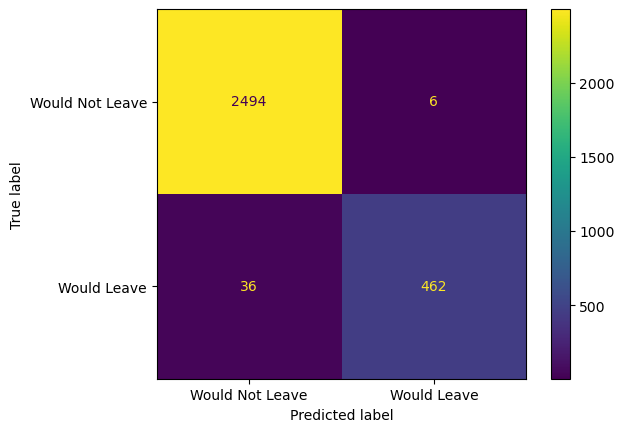

In [55]:
# plot confusion matrix for the random forest model
model_rf_pred = model_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, model_rf_pred, labels=model_rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Would Not Leave', 'Would Leave'])
disp_rf.plot()

In [56]:
# get feature importance from random forest model and plot it out
model_rf_importance = pd.DataFrame(model_rf.best_estimator_.feature_importances_, columns=['gini_importance'],index=X.columns)
model_rf_importance = model_rf_importance.sort_values(by='gini_importance',ascending=False)
model_rf_importance

,gini_importance
satisfaction_level,0.444634
number_project,0.175912
last_evaluation,0.138286
time_at_company,0.133970
average_monthly_hours,0.099945
salary,0.002175
department_sales,0.000857
department_support,0.000701
department_technical,0.000686
department_management,0.000669


<AxesSubplot:xlabel='gini_importance'>

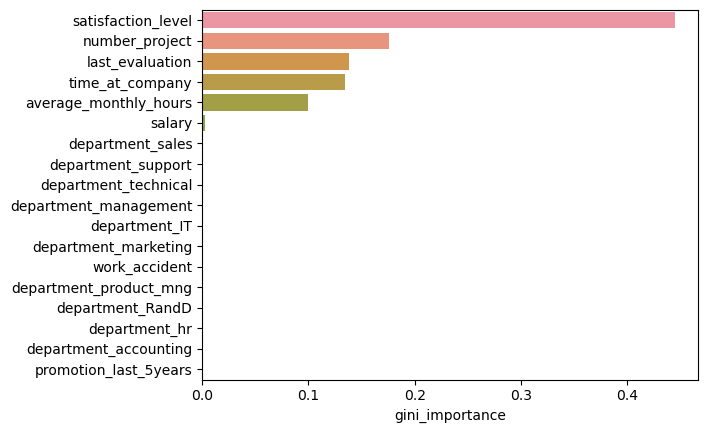

In [57]:
# Plot the feature importance through a barplot
sns.barplot(data=model_rf_importance, x='gini_importance', y=model_rf_importance.index, orient='h')

We have got the same top five contributors to why employee quit their jobs at this company, though with a different order.

In [59]:
# random forest performs slightly better than decision tree in this case
# now check the performance on the test set
model_rf_pred = model_rf.best_estimator_.predict(X_test)
print(f'Precision score is: {precision_score(y_test, model_rf_pred)}.')
print(f'Recall score is: {recall_score(y_test, model_rf_pred)}.')
print(f'F1 score is: {f1_score(y_test, model_rf_pred)}.')
print(f'Accuracy score is: {accuracy_score(y_test, model_rf_pred)}.')
print(f'AUC score is: {roc_auc_score(y_test, model_rf_pred)}.')

Precision score is: 0.9871794871794872.
Recall score is: 0.927710843373494.
F1 score is: 0.9565217391304347.
Accuracy score is: 0.9859906604402935.
AUC score is: 0.9626554216867471.


### Performance on test set is similar to those on training and cross validation set. Therefore there's no overfitting issue here.